In [1]:
#import libraries and tools
import pandas as pd
import os as os
import matplotlib.pyplot as plt
from functools import reduce


In [4]:
#set directories
os.getcwd()
os.chdir ('../')
os.chdir ('../')
os.chdir ('../')
os.chdir ('srv/lab/fmri/abcd/beh/')
os.getcwd()

'/srv/lab/fmri/abcd/beh'

In [ ]:
#Research Question: How does youth digital media use change over time?
#Variables: Time points, screentime in minutes weekdy, weeknd, age, sex,ndar,
#Create a dataframe with NDARS sorted by visit
#Create minute sumscore for weekday and weekend use
#Plot 

In [132]:
youth_screentime = pd.read_csv("abcd_stq01.txt", delimiter='\t', na_values=[""], low_memory= False)

In [135]:
col_list = youth_screentime.columns

Index(['collection_id', 'abcd_stq01_id', 'dataset_id', 'subjectkey',
       'src_subject_id', 'interview_date', 'interview_age', 'sex', 'eventname',
       'screen1_wkdy_y',
       ...
       'screen_11_wknd_hr_y', 'screentime_7_8_wknd_min',
       'screentime_wkdy_school_hr', 'screentime_wkdy_school_min',
       'screentime_wknd_school_hr', 'screentime_wknd_school_min',
       'screen_6_wkdy_error_y', 'screen_wknd_school_error_y',
       'screen_7_8_wknd_min_y', 'collection_title'],
      dtype='object', length=205)


In [151]:
youth_screentime = youth_screentime.iloc[1: , :]

In [162]:
youth_screentime.head(10)

,collection_id,abcd_stq01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,screen1_wkdy_y,...,screen_11_wknd_hr_y,screentime_7_8_wknd_min,screentime_wkdy_school_hr,screentime_wkdy_school_min,screentime_wknd_school_hr,screentime_wknd_school_min,screen_6_wkdy_error_y,screen_wknd_school_error_y,screen_7_8_wknd_min_y,collection_title
1,2573,104429,47288,NDAR_INVREBD8GTZ,NDAR_INVREBD8GTZ,02/10/2018,110,F,baseline_year_1_arm_1,.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
2,2573,106292,47288,NDAR_INVUVW9DC8Y,NDAR_INVUVW9DC8Y,08/09/2018,124,M,1_year_follow_up_y_arm_1,.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
3,2573,110183,47288,NDAR_INVWU8LHADL,NDAR_INVWU8LHADL,03/06/2019,138,F,2_year_follow_up_y_arm_1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
4,2573,104373,47288,NDAR_INVPUTKYX3K,NDAR_INVPUTKYX3K,06/14/2019,144,M,2_year_follow_up_y_arm_1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
5,2573,104240,47288,NDAR_INVRDF02RR2,NDAR_INVRDF02RR2,03/26/2019,118,F,1_year_follow_up_y_arm_1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
6,2573,110565,47288,NDAR_INVZW8G4W5A,NDAR_INVZW8G4W5A,05/27/2017,124,M,baseline_year_1_arm_1,.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
7,2573,106128,47288,NDAR_INVU6LKLMJU,NDAR_INVU6LKLMJU,05/10/2019,131,F,1_year_follow_up_y_arm_1,.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
8,2573,90466,47288,NDAR_INVFZ8BBNJK,NDAR_INVFZ8BBNJK,04/08/2019,139,F,1_year_follow_up_y_arm_1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
9,2573,98509,47288,NDAR_INVKB30X083,NDAR_INVKB30X083,06/09/2019,133,F,1_year_follow_up_y_arm_1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
10,2573,98526,47288,NDAR_INVKM0X7RY3,NDAR_INVKM0X7RY3,10/20/2018,131,M,1_year_follow_up_y_arm_1,.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...


In [164]:
#change hours to minutes
#hrs2min_columns = [9-20]
#youth_screentime['screen1_wkdy_y'] = youth_screentime['screen1_wkdy_y'].mul(60)
#youth_screentime.dtypes
baseline_stq = ('screen1_wkdy_y', 'screen2_wkdy_y', 'screen3_wkdy_y', 'screen4_wkdy_y',
       'screen5_wkdy_y', 'screen_wkdy_y', 'screen7_wknd_y', 'screen8_wknd_y',
       'screen9_wknd_y', 'screen10_wknd_y', 'screen11_wknd_y',
       'screen12_wknd_y')
#youth_screentime[baseline_stq].astype('float')
#
youth_screentime['screen1_wkdy_y'].dtypes
#youth_screentime.columns[9:21]
#youth_screentime['screen1_wkdy_y'].astype('int')

dtype('O')

In [172]:
for x in baseline_stq:
    youth_screentime[x] = youth_screentime[x].astype('f')
    print (x)

screen1_wkdy_y
screen2_wkdy_y
screen3_wkdy_y
screen4_wkdy_y
screen5_wkdy_y
screen_wkdy_y
screen7_wknd_y
screen8_wknd_y
screen9_wknd_y
screen10_wknd_y
screen11_wknd_y
screen12_wknd_y


In [173]:
youth_screentime['screen10_wknd_y'].dtypes

dtype('float32')

In [174]:
for x in baseline_stq:
    youth_screentime[x] = youth_screentime[x].mul(60)


screen1_wkdy_y
screen2_wkdy_y
screen3_wkdy_y
screen4_wkdy_y
screen5_wkdy_y
screen_wkdy_y
screen7_wknd_y
screen8_wknd_y
screen9_wknd_y
screen10_wknd_y
screen11_wknd_y
screen12_wknd_y


In [191]:
#convert hours to min
#find all the hours

hour_df = (youth_screentime.filter (regex=(".*_hr")))

In [209]:
columns_of_interest = ('screen3_wkdy_y', 'screen4_wkdy_y',
       'screen5_wkdy_y', 'screen7_wknd_y', 'screen8_wknd_y',
       'screen9_wknd_y', 'screen10_wknd_y', 'screen11_wknd_y',
       'screen12_wknd_y', 'screentime_5_wkdy_hr', 'screentime_6_wkdy_hr', 'screentime_7_wkdy_hr',
       'screentime_8_wkdy_hr', 'screentime_9_wkdy_hr',
       'screentime_7_wknd_hr',
       'screentime_8_wknd_hr', 'screentime_9_wknd_hr', 'screentime_10_wknd_hr',
       'screentime_1_wkdy_hr', 'screentime_11_wknd_hr',
       'screentime_12_wknd_hr', 'screentime_13_wknd_hr',
       'screentime_14_wknd_hr', 'screentime_15_wknd_hr',
       'screentime_2_wkdy_hr',
       'screentime_3_wkdy_hr',
       'screentime_4_wkdy_hr',
       'screen_7_8_wknd_hr_y', 'screen_8_wkdy_hr_y', 'screen_14_wknd_hr_y',
       'screen_9_wknd_hr_y', 'screen_3_wkdy_hr_y',
       'screen_4_wkdy_hr_y', 'screen_10_wknd_hr_y',
       'screen_9_wkdy_hr_y', 'screen_15_wknd_hr_y',
       'screen_12_wknd_hr_y', 'screen_1_wkdy2_hr_y', 'screen_6_wkdy_hr_y',
       'screen_5_wkdy_hr_y', 'screentime_1_wkdy2_hr', 'screentime_7_8_wknd_hr',
       'screen_11_wknd_hr_y')
#['subjectkey','src_subject_id', 'interview_date_x', 'interview_age_x', 'sex', 'eventname'

In [195]:
hour_col = ('screentime_5_wkdy_hr', 'screentime_6_wkdy_hr', 'screentime_7_wkdy_hr',
       'screentime_8_wkdy_hr', 'screentime_9_wkdy_hr',
       'screentime_wkdy_typical_hr', 'screentime_7_wknd_hr',
       'screentime_8_wknd_hr', 'screentime_9_wknd_hr', 'screentime_10_wknd_hr',
       'screentime_1_wkdy_hr', 'screentime_11_wknd_hr',
       'screentime_12_wknd_hr', 'screentime_13_wknd_hr',
       'screentime_14_wknd_hr', 'screentime_15_wknd_hr',
       'screentime_wknd_typical_hr', 'screentime_2_wkdy_hr',
       'screentime_3_wkdy_hr', 'screentime_smq_soc_med_hr',
       'screentime_4_wkdy_hr', 'screen_wknd_school_hr_y',
       'screen_7_8_wknd_hr_y', 'screen_8_wkdy_hr_y', 'screen_14_wknd_hr_y',
       'screen_wknd_typical_hr_y', 'screen_9_wknd_hr_y', 'screen_3_wkdy_hr_y',
       'screen_4_wkdy_hr_y', 'screen_10_wknd_hr_y', 'screen_wkdy_typical_hr_y',
       'screen_9_wkdy_hr_y', 'screen_wkdy_school_hr_y', 'screen_15_wknd_hr_y',
       'screen_12_wknd_hr_y', 'screen_1_wkdy2_hr_y', 'screen_6_wkdy_hr_y',
       'screen_5_wkdy_hr_y', 'screentime_1_wkdy2_hr', 'screentime_7_8_wknd_hr',
       'screen_11_wknd_hr_y', 'screentime_wkdy_school_hr',
       'screentime_wknd_school_hr')

('screentime_5_wkdy_hr',
 'screentime_6_wkdy_hr',
 'screentime_7_wkdy_hr',
 'screentime_8_wkdy_hr',
 'screentime_9_wkdy_hr',
 'screentime_wkdy_typical_hr',
 'screentime_7_wknd_hr',
 'screentime_8_wknd_hr',
 'screentime_9_wknd_hr',
 'screentime_10_wknd_hr',
 'screentime_1_wkdy_hr',
 'screentime_11_wknd_hr',
 'screentime_12_wknd_hr',
 'screentime_13_wknd_hr',
 'screentime_14_wknd_hr',
 'screentime_15_wknd_hr',
 'screentime_wknd_typical_hr',
 'screentime_2_wkdy_hr',
 'screentime_3_wkdy_hr',
 'screentime_smq_soc_med_hr',
 'screentime_4_wkdy_hr',
 'screen_wknd_school_hr_y',
 'screen_7_8_wknd_hr_y',
 'screen_8_wkdy_hr_y',
 'screen_14_wknd_hr_y',
 'screen_wknd_typical_hr_y',
 'screen_9_wknd_hr_y',
 'screen_3_wkdy_hr_y',
 'screen_4_wkdy_hr_y',
 'screen_10_wknd_hr_y',
 'screen_wkdy_typical_hr_y',
 'screen_9_wkdy_hr_y',
 'screen_wkdy_school_hr_y',
 'screen_15_wknd_hr_y',
 'screen_12_wknd_hr_y',
 'screen_1_wkdy2_hr_y',
 'screen_6_wkdy_hr_y',
 'screen_5_wkdy_hr_y',
 'screentime_1_wkdy2_hr',
 'scre

In [196]:
for x in hour_col:
    youth_screentime[x] = youth_screentime[x].astype('f')


screentime_5_wkdy_hr
screentime_6_wkdy_hr
screentime_7_wkdy_hr
screentime_8_wkdy_hr
screentime_9_wkdy_hr
screentime_wkdy_typical_hr
screentime_7_wknd_hr
screentime_8_wknd_hr
screentime_9_wknd_hr
screentime_10_wknd_hr
screentime_1_wkdy_hr
screentime_11_wknd_hr
screentime_12_wknd_hr
screentime_13_wknd_hr
screentime_14_wknd_hr
screentime_15_wknd_hr
screentime_wknd_typical_hr
screentime_2_wkdy_hr
screentime_3_wkdy_hr
screentime_smq_soc_med_hr
screentime_4_wkdy_hr
screen_wknd_school_hr_y
screen_7_8_wknd_hr_y
screen_8_wkdy_hr_y
screen_14_wknd_hr_y
screen_wknd_typical_hr_y
screen_9_wknd_hr_y
screen_3_wkdy_hr_y
screen_4_wkdy_hr_y
screen_10_wknd_hr_y
screen_wkdy_typical_hr_y
screen_9_wkdy_hr_y
screen_wkdy_school_hr_y
screen_15_wknd_hr_y
screen_12_wknd_hr_y
screen_1_wkdy2_hr_y
screen_6_wkdy_hr_y
screen_5_wkdy_hr_y
screentime_1_wkdy2_hr
screentime_7_8_wknd_hr
screen_11_wknd_hr_y
screentime_wkdy_school_hr
screentime_wknd_school_hr


In [197]:
for x in hour_col:
    youth_screentime[x] = youth_screentime[x].mul(60)


screentime_5_wkdy_hr
screentime_6_wkdy_hr
screentime_7_wkdy_hr
screentime_8_wkdy_hr
screentime_9_wkdy_hr
screentime_wkdy_typical_hr
screentime_7_wknd_hr
screentime_8_wknd_hr
screentime_9_wknd_hr
screentime_10_wknd_hr
screentime_1_wkdy_hr
screentime_11_wknd_hr
screentime_12_wknd_hr
screentime_13_wknd_hr
screentime_14_wknd_hr
screentime_15_wknd_hr
screentime_wknd_typical_hr
screentime_2_wkdy_hr
screentime_3_wkdy_hr
screentime_smq_soc_med_hr
screentime_4_wkdy_hr
screen_wknd_school_hr_y
screen_7_8_wknd_hr_y
screen_8_wkdy_hr_y
screen_14_wknd_hr_y
screen_wknd_typical_hr_y
screen_9_wknd_hr_y
screen_3_wkdy_hr_y
screen_4_wkdy_hr_y
screen_10_wknd_hr_y
screen_wkdy_typical_hr_y
screen_9_wkdy_hr_y
screen_wkdy_school_hr_y
screen_15_wknd_hr_y
screen_12_wknd_hr_y
screen_1_wkdy2_hr_y
screen_6_wkdy_hr_y
screen_5_wkdy_hr_y
screentime_1_wkdy2_hr
screentime_7_8_wknd_hr
screen_11_wknd_hr_y
screentime_wkdy_school_hr
screentime_wknd_school_hr


In [198]:
youth_screentime.head(10)

,collection_id,abcd_stq01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,screen1_wkdy_y,...,screen_11_wknd_hr_y,screentime_7_8_wknd_min,screentime_wkdy_school_hr,screentime_wkdy_school_min,screentime_wknd_school_hr,screentime_wknd_school_min,screen_6_wkdy_error_y,screen_wknd_school_error_y,screen_7_8_wknd_min_y,collection_title
1,2573,104429,47288,NDAR_INVREBD8GTZ,NDAR_INVREBD8GTZ,02/10/2018,110,F,baseline_year_1_arm_1,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
2,2573,106292,47288,NDAR_INVUVW9DC8Y,NDAR_INVUVW9DC8Y,08/09/2018,124,M,1_year_follow_up_y_arm_1,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
3,2573,110183,47288,NDAR_INVWU8LHADL,NDAR_INVWU8LHADL,03/06/2019,138,F,2_year_follow_up_y_arm_1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
4,2573,104373,47288,NDAR_INVPUTKYX3K,NDAR_INVPUTKYX3K,06/14/2019,144,M,2_year_follow_up_y_arm_1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
5,2573,104240,47288,NDAR_INVRDF02RR2,NDAR_INVRDF02RR2,03/26/2019,118,F,1_year_follow_up_y_arm_1,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
6,2573,110565,47288,NDAR_INVZW8G4W5A,NDAR_INVZW8G4W5A,05/27/2017,124,M,baseline_year_1_arm_1,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
7,2573,106128,47288,NDAR_INVU6LKLMJU,NDAR_INVU6LKLMJU,05/10/2019,131,F,1_year_follow_up_y_arm_1,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
8,2573,90466,47288,NDAR_INVFZ8BBNJK,NDAR_INVFZ8BBNJK,04/08/2019,139,F,1_year_follow_up_y_arm_1,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
9,2573,98509,47288,NDAR_INVKB30X083,NDAR_INVKB30X083,06/09/2019,133,F,1_year_follow_up_y_arm_1,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...
10,2573,98526,47288,NDAR_INVKM0X7RY3,NDAR_INVKM0X7RY3,10/20/2018,131,M,1_year_follow_up_y_arm_1,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescent Brain Cognitive Development Study (...


In [210]:
#adding a new col
youth_screentime['st_ssc_min'] = youth_screentime['screen1_wkdy_y'].fillna(0)+ youth_screentime['screen2_wkdy_y'].fillna(0)

In [212]:
for x in columns_of_interest:
    youth_screentime['st_ssc_min'] = youth_screentime['st_ssc_min'] + youth_screentime[x].fillna(0)

In [233]:
youth_screentime['st_ssc_min']


1        1260.0
2         180.0
3        1560.0
4         780.0
5         705.0
          ...  
39762    1110.0
39763     300.0
39764     420.0
39765     300.0
39766     225.0
Name: st_ssc_min, Length: 39766, dtype: float32

TypeError: plot got an unexpected keyword argument 'x'

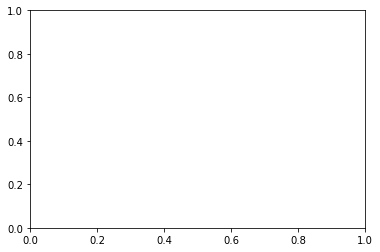

In [231]:
#plot
#youth_screentime['st_ssc_min'].plot()

df = youth_screentime
plt.plot(x= youth_screentime['st_ssc_min'], y= youth_screentime["eventname"])


In [232]:
youth_screentime.to_csv ('ABCD_youth_screentime.csv')

In [38]:
#FilesOfInterst = ("abcd_stq01.txt", "stq01.txt","abcd_mtpa01", "abcd_mtpap01","abcd_mte01", "abcd_mtpay01", "abcd_mtpry01", "abcd_ssmty01", "screentime_psq_p01")
#import files
youth_screentime = pd.read_csv("abcd_stq01.txt", delimiter='\t', na_values=[""])
parent_reportscreentime = pd.read_csv("stq01.txt", delimiter='\t')
#parent_preEars = pd.read_csv("abcd_mtpap01.txt", delimiter='\t')
#parent_postEars = pd.read_csv("abcd_mtpa01.txt", delimiter='\t')
#youth_preEars = pd.read_csv("abcd_mtpry01.txt", delimiter='\t')
#youth_postEars = pd.read_csv("abcd_mtpay01.txt", delimiter='\t')
#Ears = pd.read_csv("abcd_mte01.txt", delimiter='\t')
parent_screentime = pd.read_csv("screentime_psq_p01.txt", delimiter='\t')
sumscore_screentime = pd.read_csv("abcd_ssmty01.txt", delimiter='\t')


In [46]:
#creating subsamples to run preliminary anlalyses
youthst_sub = youth_screentime.head (300)
parentrst_suvb = parent_reportscreentime.head (300)
parentst_sub = parent_screentime.head (300)
sumscorest_sub = sumscore_screentime.head (300)

In [50]:
# creating a list of data frames
sub_list = [youthst_sub, parentrst_suvb, parentst_sub, sumscorest_sub]
merge_on = ['subjectkey', 'src_subject_id', 'sex', 'eventname', 'collection_id', 'dataset_id']

In [55]:
#function to merge data frames into 1

#def mergefiles (sub_list, countfiles, i=0):
#    if i == (countfiles - 2):
 #       return
  #  screentime_sub = sub_list[i].merge(mergefiles(sub_list[i+1], countfiles, i=i+1), on= 
screentime_merged = reduce(lambda  left,right: pd.merge(left,right,on= merge_on,
                                            how='outer'), sub_list)


/tmp/ipykernel_1145892/238493163.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'collection_title_x', 'interview_age_x', 'interview_date_x'} in the result is deprecated and will raise a MergeError in a future version.
  screentime_merged = reduce(lambda  left,right: pd.merge(left,right,on= merge_on,


In [56]:
screentime_merged.head (20)

,collection_id,abcd_stq01_id,dataset_id,subjectkey,src_subject_id,interview_date_x,interview_age_x,sex,eventname,screen1_wkdy_y,...,stq_y_ss_weekday,stq_y_ss_weekday_nm,stq_y_ss_weekday_nt,stq_y_ss_weekend,stq_y_ss_weekend_nm,stq_y_ss_weekend_nt,pstr_ss_pr,erq_ss_reappraisal_pr,erq_ss_suppress_pr,collection_title_y
0,collection_id,abcd_stq01_id,dataset_id,The NDAR Global Unique Identifier (GUID) for r...,Subject ID how it's defined in lab/project,Date on which the interview/genetic test/sampl...,Age in months at the time of the interview/tes...,Sex of subject at birth,The event name for which the data was collected,"On a typical weekday, how many hours do you: W...",...,Screen Time Youth: Weekday Sum: screen1_wkdy_...,"Screen Time Youth, Weekday Sum: Number Missin...","Screen Time Youth, Weekday Sum: Number Total ...",Screen Time Youth: Weekend Sum: screen7_wknd_y...,"Screen Time Youth, Weekend Sum: Number Missin...","Screen Time Youth, Weekend Sum: Number Total ...",prorate the sum of the 10 questions,"prorate the sum of Qs 2,4,6","prorate the sum of Qs 1,3,5",collection_title
1,2573,104429,47288,NDAR_INVREBD8GTZ,NDAR_INVREBD8GTZ,02/10/2018,110,F,baseline_year_1_arm_1,.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2573,106292,47288,NDAR_INVUVW9DC8Y,NDAR_INVUVW9DC8Y,08/09/2018,124,M,1_year_follow_up_y_arm_1,.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2573,110183,47288,NDAR_INVWU8LHADL,NDAR_INVWU8LHADL,03/06/2019,138,F,2_year_follow_up_y_arm_1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2573,104373,47288,NDAR_INVPUTKYX3K,NDAR_INVPUTKYX3K,06/14/2019,144,M,2_year_follow_up_y_arm_1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2573,104240,47288,NDAR_INVRDF02RR2,NDAR_INVRDF02RR2,03/26/2019,118,F,1_year_follow_up_y_arm_1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2573,110565,47288,NDAR_INVZW8G4W5A,NDAR_INVZW8G4W5A,05/27/2017,124,M,baseline_year_1_arm_1,.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2573,106128,47288,NDAR_INVU6LKLMJU,NDAR_INVU6LKLMJU,05/10/2019,131,F,1_year_follow_up_y_arm_1,.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2573,90466,47288,NDAR_INVFZ8BBNJK,NDAR_INVFZ8BBNJK,04/08/2019,139,F,1_year_follow_up_y_arm_1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2573,98509,47288,NDAR_INVKB30X083,NDAR_INVKB30X083,06/09/2019,133,F,1_year_follow_up_y_arm_1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
screentime_merged.columns

Index(['collection_id', 'abcd_stq01_id', 'dataset_id', 'subjectkey',
       'src_subject_id', 'interview_date_x', 'interview_age_x', 'sex',
       'eventname', 'screen1_wkdy_y',
       ...
       'stq_y_ss_weekday', 'stq_y_ss_weekday_nm', 'stq_y_ss_weekday_nt',
       'stq_y_ss_weekend', 'stq_y_ss_weekend_nm', 'stq_y_ss_weekend_nt',
       'pstr_ss_pr', 'erq_ss_reappraisal_pr', 'erq_ss_suppress_pr',
       'collection_title_y'],
      dtype='object', length=317)

In [ ]:
#screentime_merged.plot.density()

In [75]:
screentime_merged.shape

(1197, 317)

In [77]:
screentime_merged.describe ()

,collection_id,abcd_stq01_id,dataset_id,subjectkey,src_subject_id,interview_date_x,interview_age_x,sex,eventname,screen1_wkdy_y,...,stq_y_ss_weekday,stq_y_ss_weekday_nm,stq_y_ss_weekday_nt,stq_y_ss_weekend,stq_y_ss_weekend_nm,stq_y_ss_weekend_nt,pstr_ss_pr,erq_ss_reappraisal_pr,erq_ss_suppress_pr,collection_title_y
count,1197,300,1197,1197,1197,300,300,1197,1197,170,...,180,300,300,180,300,300,1,1,1,300
unique,2,300,5,1142,1142,270,60,3,5,8,...,51,3,2,49,3,2,1,1,1,2
top,2573,abcd_stq01_id,47288,NDAR_INVB7CBMZ2F,NDAR_INVB7CBMZ2F,11/20/2018,145,M,3_year_follow_up_y_arm_1,1,...,3,0,6,2,0,6,prorate the sum of the 10 questions,"prorate the sum of Qs 2,4,6","prorate the sum of Qs 1,3,5",Adolescent Brain Cognitive Development Study (...
freq,1196,1,299,3,3,3,12,651,438,41,...,15,179,299,17,179,299,1,1,1,299


In [78]:
screentime_merged.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1196
Columns: 317 entries, collection_id to collection_title_y
dtypes: object(317)
memory usage: 2.9+ MB


In [ ]:
#Sum score of parent use on weekday and weekend
#convert everythin into minutes
col_names = screentime_merged.columns

def convert2min 

In [ ]:
#screentime_merged.plot(x= ('stq_y_ss_weekday'), y = ('

In [80]:
youth_screentime.columns

TypeError: 'Index' object is not callable

In [64]:
parent_screentime.columns

Index(['collection_id', 'screentime_psq_p01_id', 'dataset_id', 'subjectkey',
       'src_subject_id', 'interview_date', 'interview_age', 'sex', 'eventname',
       'psq_q1_p', 'psq_q2_p', 'psq_q3_p', 'psq_q4_p', 'psq_q5_p', 'psq_q6_p',
       'psq_q7_p', 'psq_q8_p', 'psq_q9_p', 'psq_q10_p', 'psq_q11_p',
       'psq_q12_p', 'psq_q13_p', 'psq_q14_p', 'stp_1_wkdy_hr_p',
       'stp_1_wkdy_min_p', 'stp_1_wkend_hr_p', 'stp_1_wkend_min_p',
       'stp_2_wkdy_hr_p', 'stp_2_wkdy_min_p', 'stp_2_wkend_hr_p',
       'stp_2_wkend_min_p', 'stp_3_wkdy_hr_p', 'stp_3_wkdy_min_p',
       'stp_3_wkend_hr_p', 'stp_3_wkend_min_p', 'stp_4_wkdy_hr_p',
       'stp_4_wkdy_min_p', 'stp_4_wkend_hr_p', 'stp_4_wkend_min_p',
       'stp_5_wkdy_hr_p', 'stp_5_wkdy_min_p', 'stp_5_wkend_hr_p',
       'stp_5_wkend_min_p', 'stp_6_wkdy_hr_p', 'stp_6_wkdy_min_p',
       'stp_6_wkend_hr_p', 'stp_6_wkend_min_p', 'stp_8_wkdy_hr_p',
       'stp_8_wkdy_min_p', 'stp_8_wkend_hr_p', 'stp_8_wkend_min_p',
       'stp_9_wkdy_hr_p', 

In [65]:
parent_reportscreentime.columns

Index(['collection_id', 'stq01_id', 'dataset_id', 'subjectkey',
       'src_subject_id', 'interview_date', 'interview_age', 'sex',
       'screentime1_p_hours', 'screentime1_p_minutes', 'screentime2_p_hours',
       'screentime2_p_minutes', 'eventname', 'scrtime_p_select_lang___1',
       'screentime_pmum_short_6_p', 'screentime_pmum_short_7_p',
       'screentime_pmum_short_8_p', 'screentime_pmum_short_9_p',
       'screentime_scrn_media_p__1', 'screentime_scrn_media_p__2',
       'screentime_scrn_media_p__3', 'screentime_scrn_media_p__4',
       'screentime_scrn_media_p__5', 'screentime_scrn_media_p__6',
       'screentime_scrn_media_p__7', 'screentime_scrn_media_p__777',
       'screentime_scrn_media_oth_p', 'screentime_1_wkdy_hrs_p',
       'screentime_1_wkdy_min_p', 'screentime_1_wknd_hrs_p',
       'screentime_1_wknd_min_p', 'screentime_device_p__0',
       'screentime_device_p__1', 'screentime_device_p__2',
       'screentime_start_time_p', 'screentime_device_p__3',
       'scre

In [66]:
sumscore_screentime.columns

Index(['collection_id', 'abcd_ssmty01_id', 'dataset_id', 'subjectkey',
       'src_subject_id', 'interview_age', 'interview_date', 'sex', 'eventname',
       'stq_y_ss_weekday', 'stq_y_ss_weekday_nm', 'stq_y_ss_weekday_nt',
       'stq_y_ss_weekend', 'stq_y_ss_weekend_nm', 'stq_y_ss_weekend_nt',
       'pstr_ss_pr', 'erq_ss_reappraisal_pr', 'erq_ss_suppress_pr',
       'collection_title'],
      dtype='object')